## (a) Plot of $\eta$ as a function of temperature

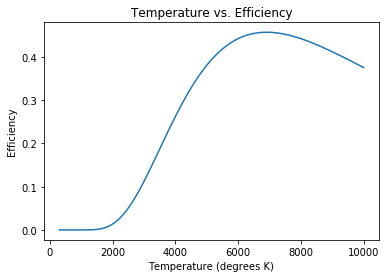

In [1]:
%matplotlib inline
# enter code here that calculates I1, I2 and sigma
from math import exp, pi, sqrt
from decimal import Decimal
from pylab import plot, show, xlabel, ylabel, title
from numpy import linspace

N = 100
Tvals = linspace(300, 10000, N)

def f(x):
    if (x == float("inf")):
        return 0.0
    if (x > 0.0):
        numer = x**3
        denom = exp(x) - 1.0
        return numer / denom
    return 0.0
    
def integrate(a, b):
    delta = (b-a) / N
    s = 0.5*(f(a) + f(b))
    for i in range(N):
        s += f(a + i*delta)
    return delta*s

h = 6.626e-34 ##m^2*kg*s^-1
lam1 = 3.9e-7 ## meters
lam2 = 7.5e-7 ## meters
c = 3e8 ## meters/s
k = 1.38064852e-23 #Boltzman constant in m^2*kg / s^2*K

def computeEfficiency(T):
    bound1 = (h*c)/(lam1*k*T)
    bound2 = (h*c)/(lam2*k*T)
    return 15*integrate(bound2, bound1)/(pi**4)

nvals = [computeEfficiency(i) for i in Tvals]
plot(Tvals, nvals)
xlabel("Temperature (degrees K)")
ylabel("Efficiency")
title("Temperature vs. Efficiency")
show()

## (b) Maximum Efficiency

In [3]:
z = (1 + sqrt(5))/2    # golden ratio
accuracy = 1e3        # desired accuracy
x1 = 0.00              # left bracket
x4 = 10000          # right bracket
x2 = x4 - (x4 - x1)/z  # interior point
x3 = x1 + (x4 - x1)/z  # interior point

# Main loop of search
while x4 - x1 > accuracy:
        
    if computeEfficiency(x2) > computeEfficiency(x3):
        x4 = x3
        x3 = x2
        x2 = x4 - (x4 - x1)/z
    else:
        x1 = x2
        x2 = x3
        x3 = x1 + (x4 - x1)/z
        
# Output results
print("Golden ratio maximum = ",(x1 + x4)/2, "K")

Golden ratio maximum =  6631.189606246319 K


by 6,000 degrees Kelvin Tungsten will melt so it doesn't make sense to run a Tungsten-filament lightbulb at this temperature.